**Processamento Digital de Imagens - 2022/01**<br/>
**Engenharia da Computação**<br/>
**Aluno:** Gabriel Soares Baptista, 2018102117<br/>

### Questão 3

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology

### Resolução

Primeiro lemos a imagem com cores que iremos obter a fronteira.

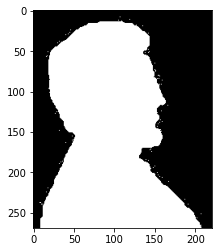

In [9]:
image = plt.imread('../images/Fig9.14(a).jpg')
binary_image = np.where(image > 0, 1, 0)
plt.imshow(binary_image, cmap='gray')
plt.show()

Como a imagem binarizada possui alguns ruídos, podemos aplicar uma erosão com um elemento estruturante pequeno para remover esses ruídos.

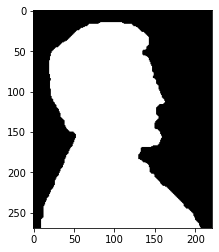

In [10]:
binary_image = morphology.erosion(image, footprint=morphology.rectangle(3, 3))

plt.imshow(binary_image, cmap='gray')
plt.show()

Como podemos ver, a erosão removeu muito bem os pequenos ruidos, portanto, podemos encontrar a fronteira da imagem através da subtração da imagem original pela imagem aplicada da erosão com um elemento estrutrante adequado.

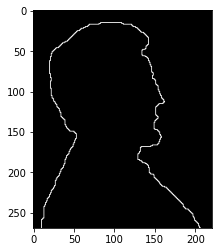

In [11]:
edges = binary_image - morphology.erosion(binary_image, footprint=morphology.rectangle(3, 3))

plt.imshow(edges, cmap='gray')
plt.show()

Observa-se que a fronteira, embora um pouco grosseira, reflete perfeitamente o contorno da imagem. Portanto, para preenche-la, primeiro devemos encontrar a imagem complementar, necessária para o algoritmo de preenchimento de buracos.

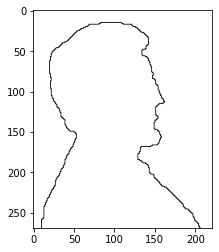

In [12]:
image_c = 255 - edges
plt.imshow(image_c, cmap='gray')
plt.show()

O que nos queremos é, colocar um ponto dentro da imagem de forma que iremos aplicar uma série de dilatações, controlando o ponto de crescimento pela intersecção com a imagem complementar.

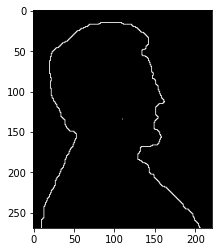

In [22]:
N, M = image.shape
mask = np.zeros(shape=image.shape).astype(int)
mask[N//2, M//2] = 255

plt.imshow(edges + mask, cmap='gray')
plt.show()

Portanto, iremos aplicar uma série de dilatações até não exista diferenças nas duas última imagens obtidas.

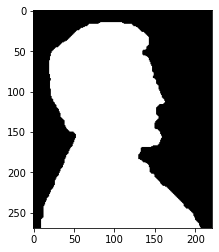

In [21]:
last_mask = np.zeros(shape=mask.shape)

while (last_mask != mask).any():
    last_mask = mask
    mask = morphology.dilation(mask, footprint=morphology.rectangle(3, 3)).astype(int) & image_c

plt.imshow(edges + mask, cmap='gray')
plt.show()

Podemos ver que o algoritmo foi capaz de preencher adequadamente a imagem, sendo muito semelhante a imagem original antes de encontrarmos os limites da imagem.